In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [99]:
df_churn = pd.read_csv('Datasets/churn.csv')
df_customer = pd.read_csv('Datasets/customer.csv')
df_orders = pd.read_csv('Datasets/orders.csv')
df_products = pd.read_csv('Datasets/products.csv')
df_promotions = pd.read_csv('Datasets/promotions.csv')
# my_df_list = [df_churn, df_customer, df_orders, df_products, df_promotions] 
# my_dfs_name = ['df_churn', 'df_customer', 'df_orders', 'df_products', 'df_promotions']

In [100]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              2000 non-null   int64  
 1   Gender                  2000 non-null   object 
 2   Age                     2000 non-null   int64  
 3   Annual Income ($)       2000 non-null   int64  
 4   Profession              1965 non-null   object 
 5   Work Experience         2000 non-null   int64  
 6   Family Size             2000 non-null   int64  
 7   City                    2000 non-null   object 
 8   LastPurchaseDate        2000 non-null   object 
 9   FirstPurchaseDate       2000 non-null   object 
 10  TotalPurchases          2000 non-null   int64  
 11  TotalAmount             2000 non-null   float64
 12  TotalQuantity           2000 non-null   int64  
 13  Recency                 2000 non-null   int64  
 14  TimeSinceFirstPurchase  2000 non-null   

In [101]:
df_churn.head()

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,City,LastPurchaseDate,FirstPurchaseDate,...,Recency,TimeSinceFirstPurchase,Frequency,MonetaryValue,LongTermCustomer,R,F,M,RFM_Score,Churn
0,1,Male,19,15000,Healthcare,1,4,Raleigh,16-04-2023,30-07-2018,...,4,1725,0.048116,28.577033,True,4,3,4,434,0
1,2,Male,21,35000,Engineer,3,3,Detroit,23-02-2023,01-09-2018,...,56,1692,0.083924,25.901167,True,3,4,3,343,1
2,3,Female,20,86000,Engineer,1,1,San Antonio,28-01-2023,24-07-2019,...,82,1366,0.057101,28.938142,True,3,3,4,334,0
3,4,Female,23,59000,Lawyer,0,2,Detroit,29-12-2022,18-05-2018,...,112,1798,0.039488,25.026847,False,3,2,2,322,0
4,5,Female,31,38000,Entertainment,2,6,Tulsa,26-06-2022,23-03-2019,...,298,1489,0.049026,21.191460,False,1,3,1,131,0


In [102]:
df_orders.head()

,OrderID,CustomerID,ProductID,Purchase_Date,Quantity,Original_Price,Discount,Discounted_Price,PromotionID,Brand,Category,Total_Amount
0,1,1564,7088,2017-09-02,1,110.0,0,110.0,NaN,Zara,Accessories,110.0
1,1,1564,238,2017-09-02,2,60.0,5,57.0,NaN,Puma,Sportswear,114.0
2,1,1564,8669,2017-09-02,1,210.0,15,178.5,NaN,Ralph Lauren,Sleepwear,178.5
3,2,1471,3570,2017-09-02,3,330.0,0,330.0,NaN,Louis Vuitton,Outerwear,990.0
4,2,1471,396,2017-09-02,1,130.0,10,117.0,NaN,Adidas,Sportswear,117.0


In [103]:
# converting date columns to datetime format
df_churn.FirstPurchaseDate = pd.to_datetime(df_churn.FirstPurchaseDate)
df_churn.LastPurchaseDate = pd.to_datetime(df_churn.LastPurchaseDate)
df_orders.Purchase_Date = pd.to_datetime((df_orders.Purchase_Date))
df_products.Release_Date = pd.to_datetime(df_products.Release_Date)
df_promotions.StartDate = pd.to_datetime(df_promotions.StartDate)
df_promotions.EndDate = pd.to_datetime(df_promotions.EndDate)

In [104]:
df_churn.LongTermCustomer=df_churn.LongTermCustomer.astype(int)

In [105]:
# df_churn.info()

### Feature Selection

In [106]:
df_churn.select_dtypes('number').columns

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Work Experience',
       'Family Size', 'TotalPurchases', 'TotalAmount', 'TotalQuantity',
       'Recency', 'TimeSinceFirstPurchase', 'Frequency', 'MonetaryValue',
       'LongTermCustomer', 'R', 'F', 'M', 'RFM_Score', 'Churn'],
      dtype='object')

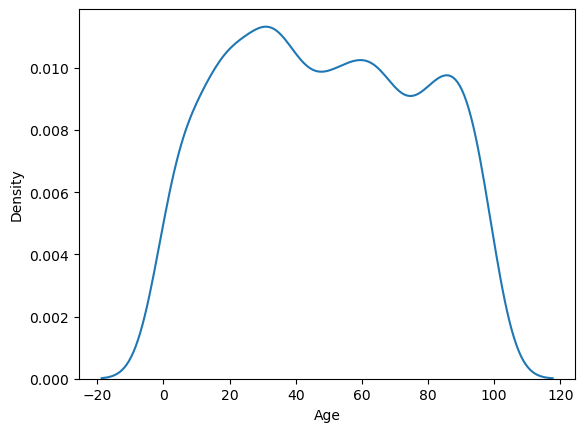

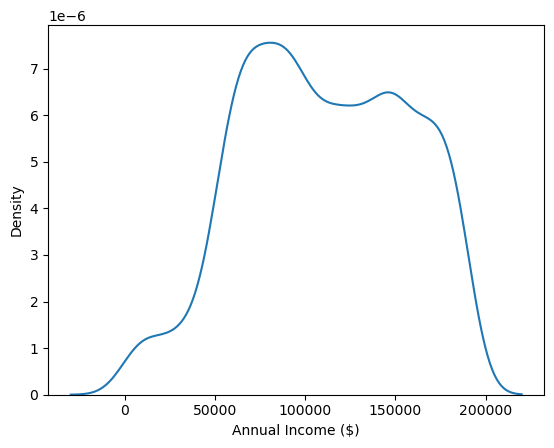

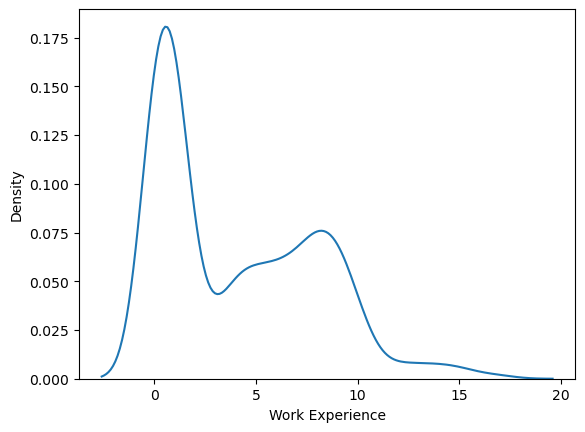

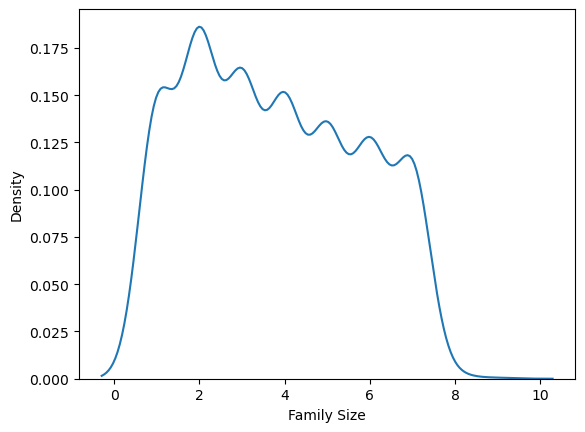

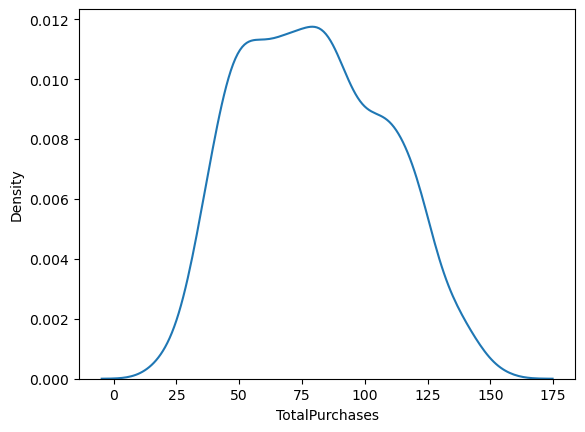

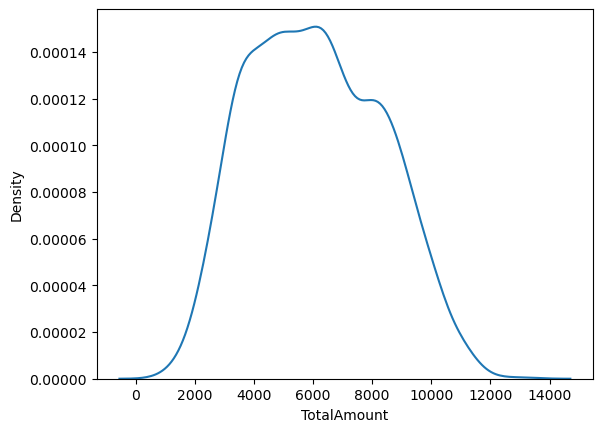

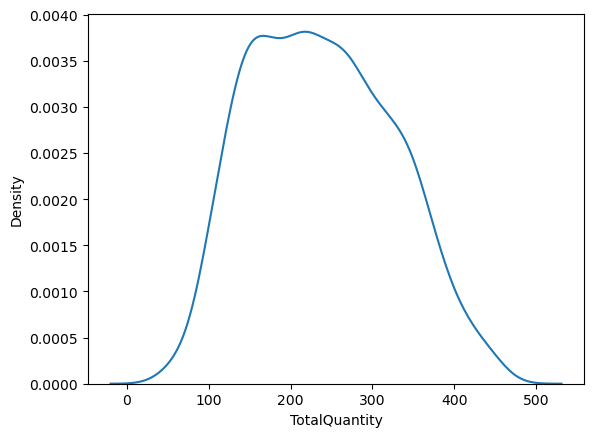

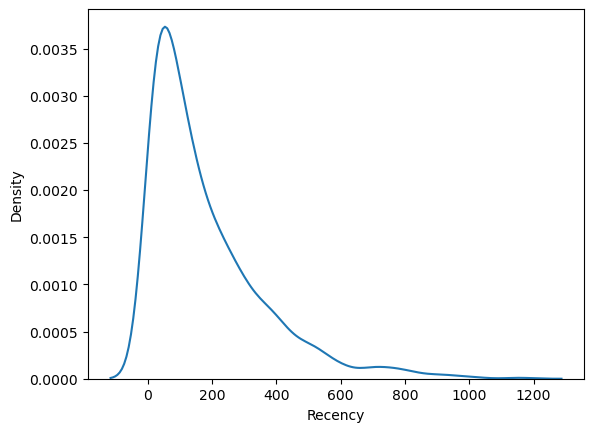

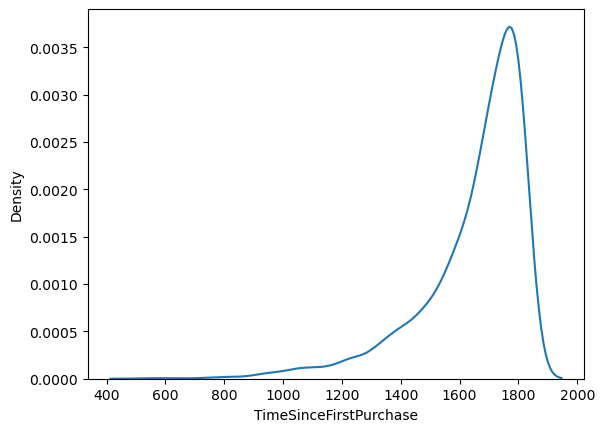

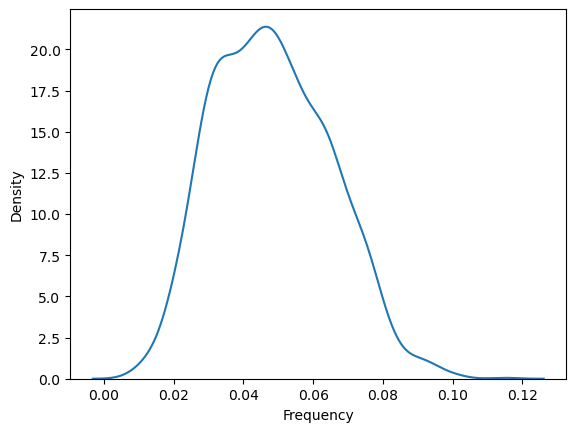

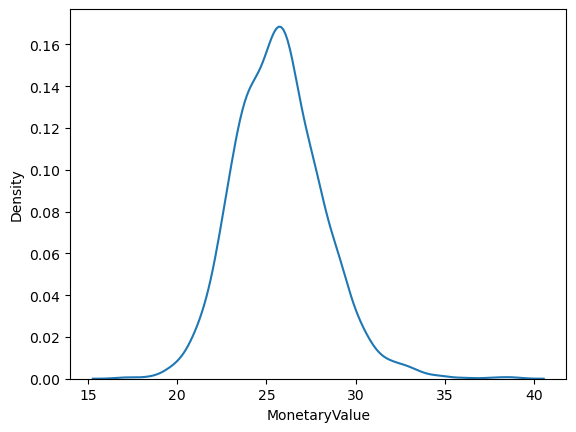

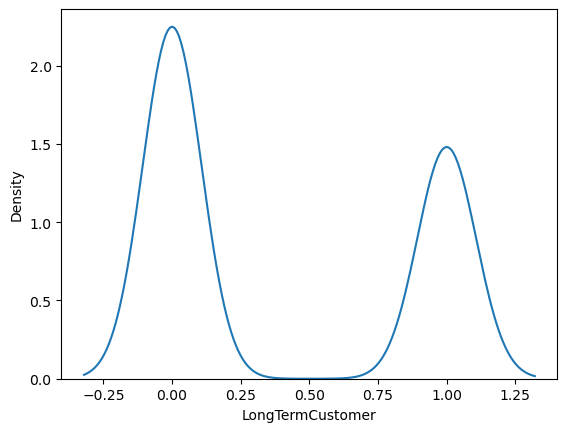

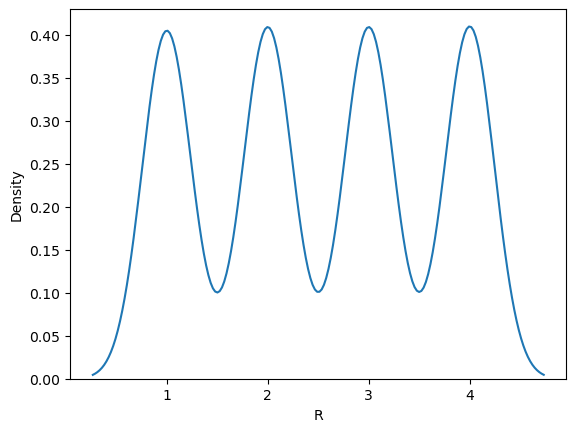

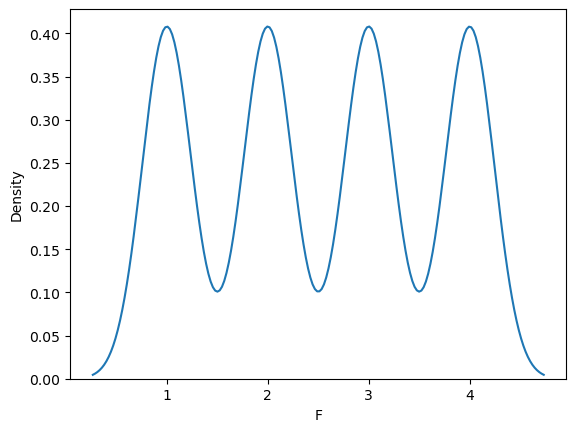

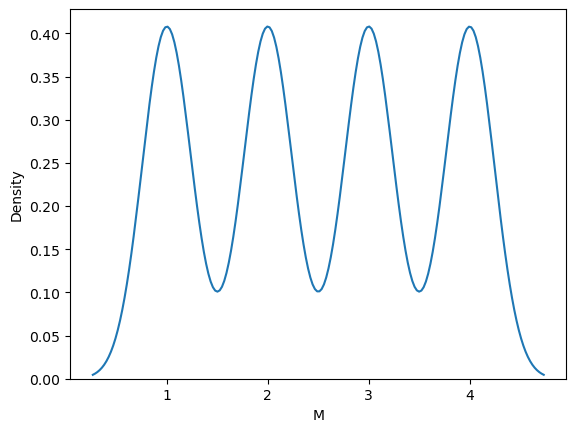

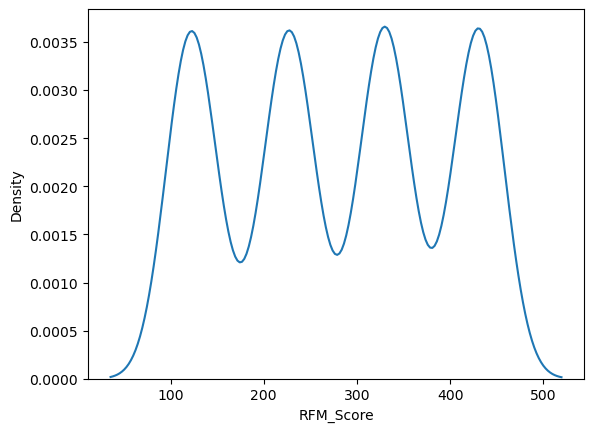

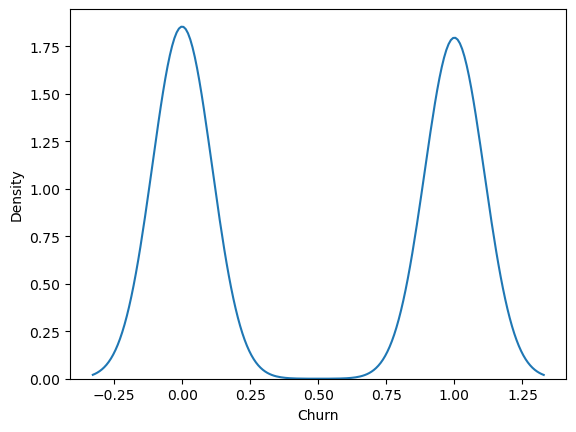

In [107]:
for i in df_churn.select_dtypes('number').columns:
    if(i!='CustomerID'):
        sns.kdeplot(df_churn[i])
        
    plt.show()
    
    

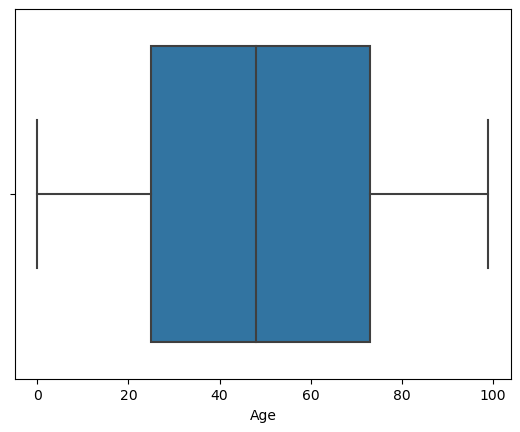

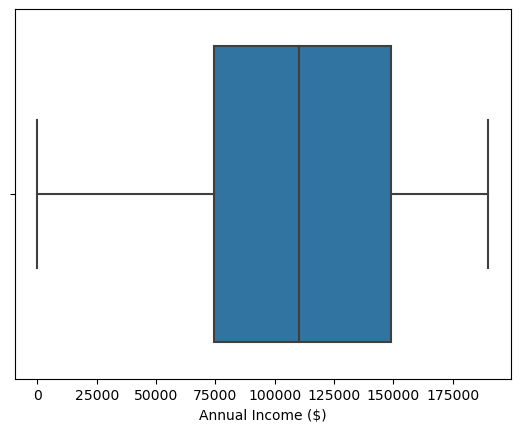

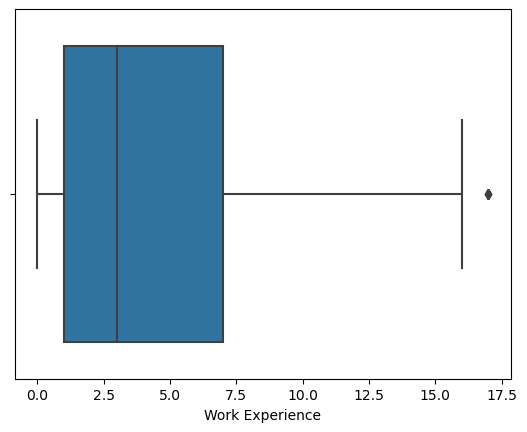

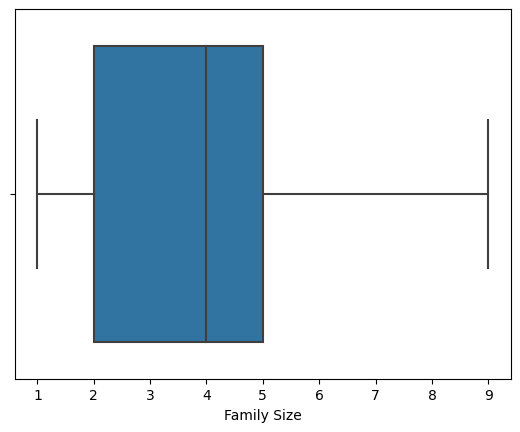

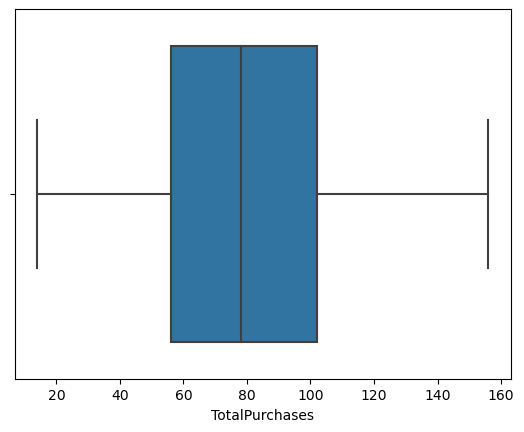

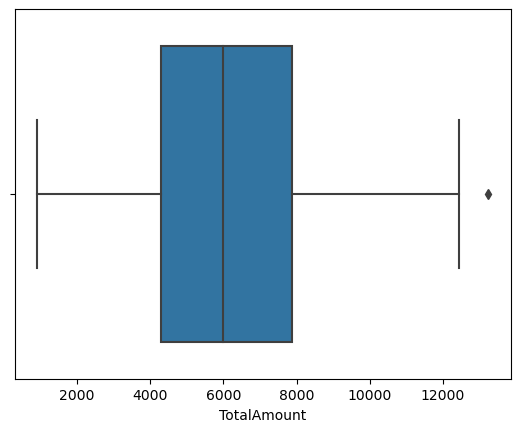

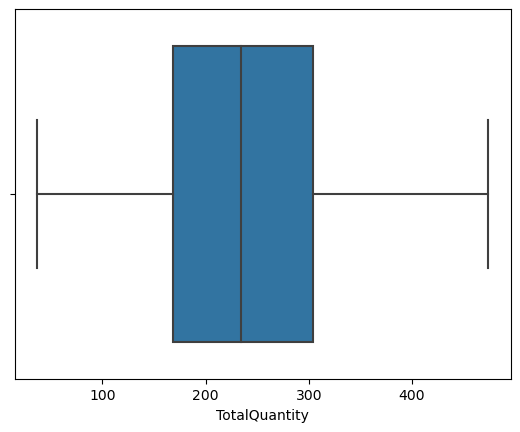

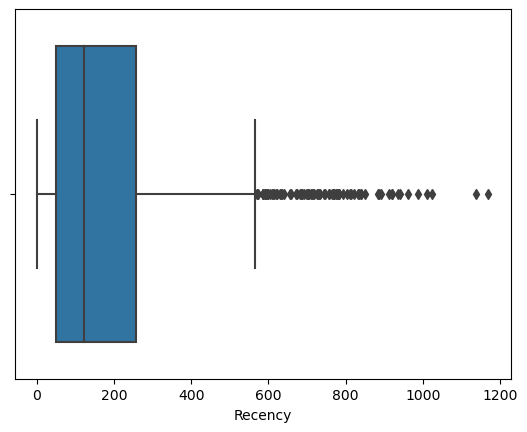

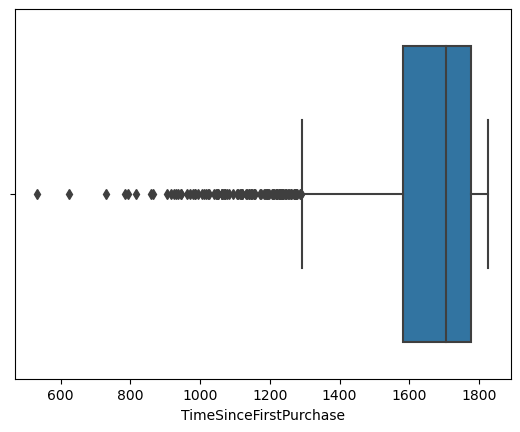

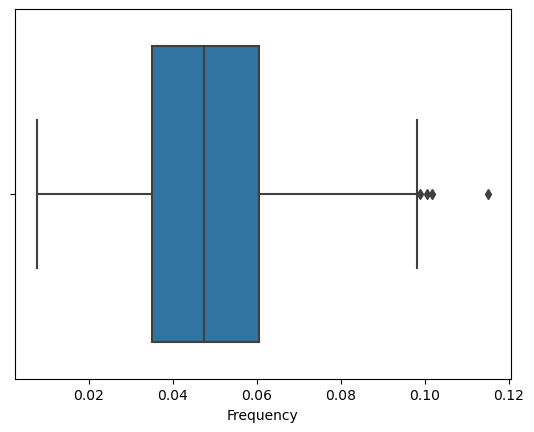

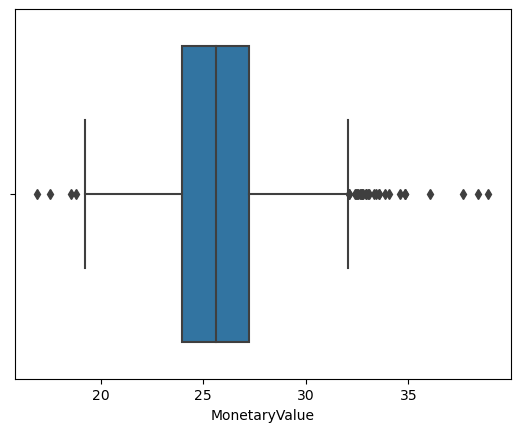

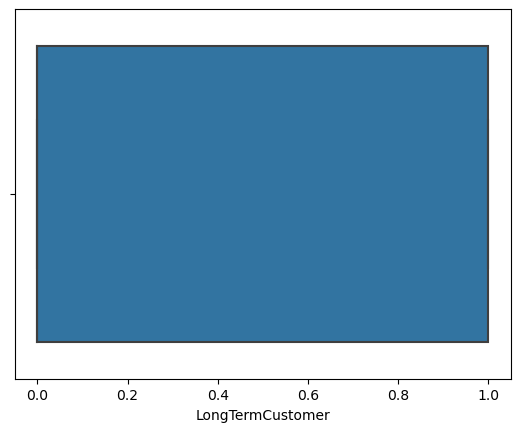

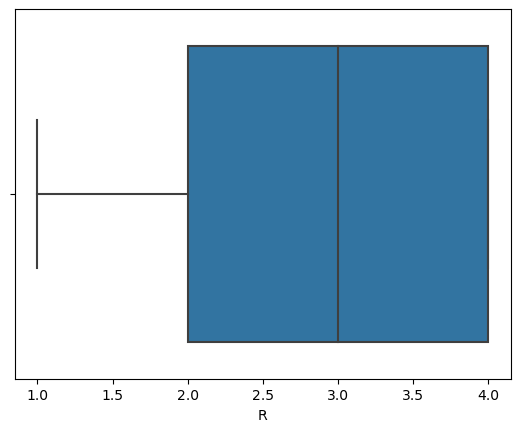

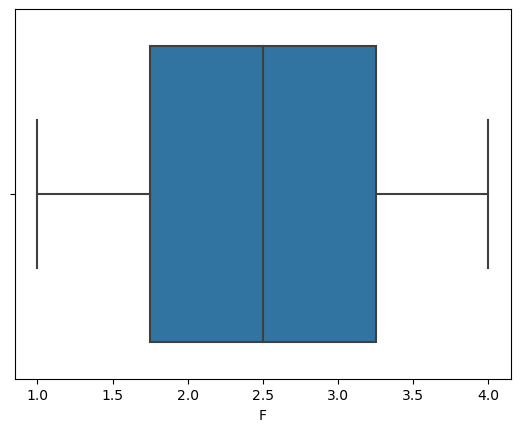

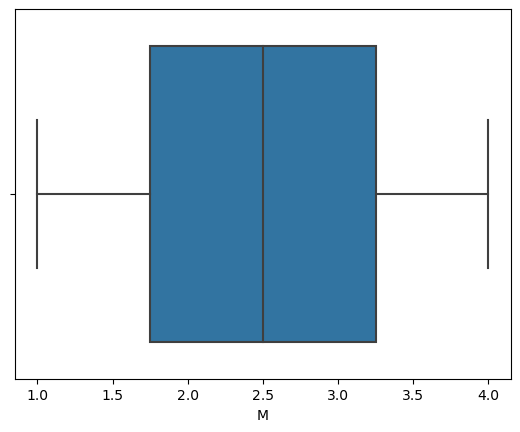

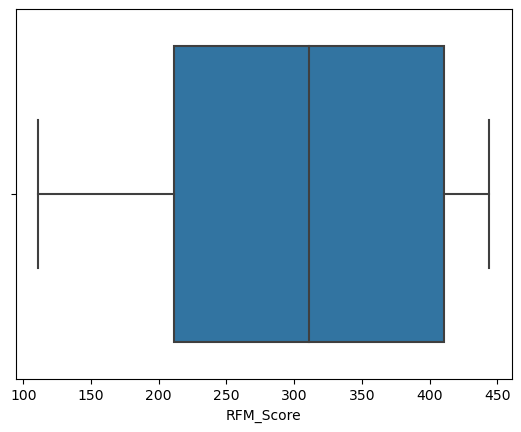

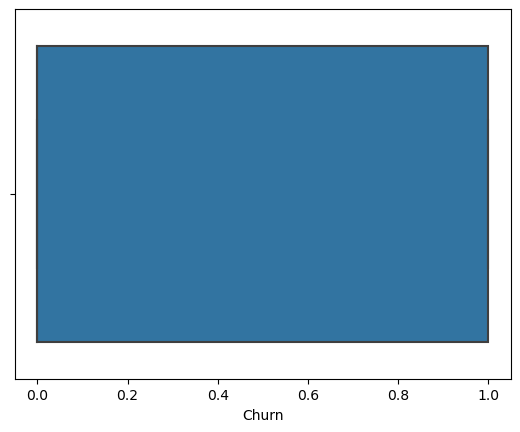

In [108]:
for i in df_churn.select_dtypes('number').columns:
    if(i!='CustomerID'):
        sns.boxplot(df_churn[i])
        
    plt.show()
    
    

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

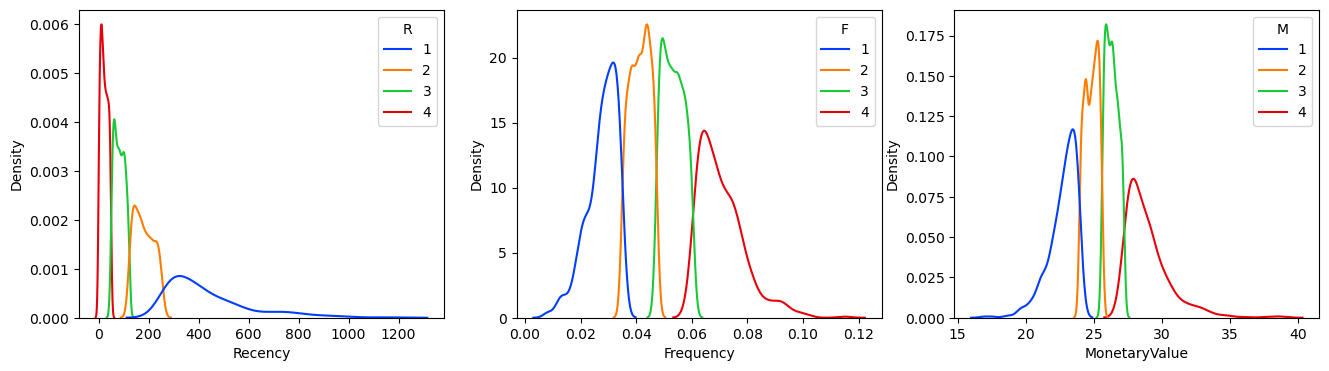

In [109]:
plt.figure(figsize=(16,4))

plt.subplot(131)
sns.kdeplot(df_churn.Recency, hue=df_churn.R, palette='bright')

plt.subplot(132)
sns.kdeplot(df_churn.Frequency, hue=df_churn.F, palette='bright')

plt.subplot(133)
sns.kdeplot(df_churn.MonetaryValue, hue=df_churn.M, palette='bright')

<AxesSubplot:>

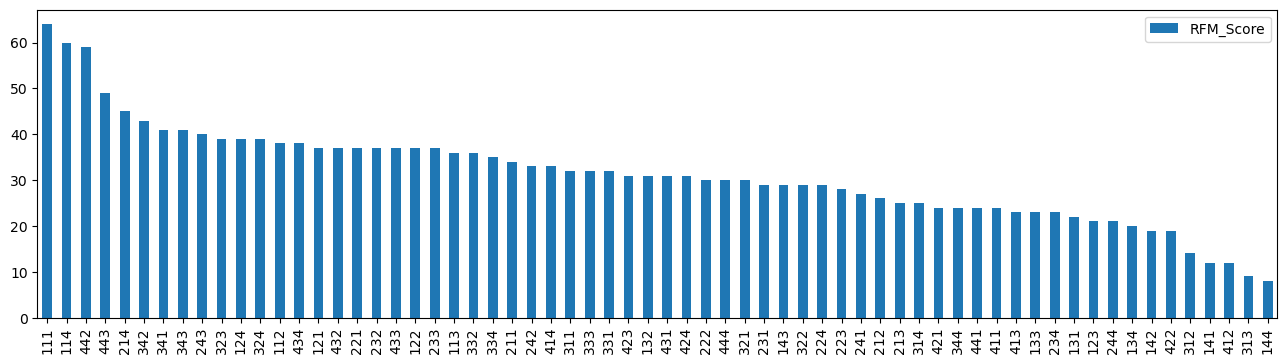

In [110]:
pd.DataFrame(df_churn.RFM_Score.value_counts()).plot(kind='bar',figsize=(16,4))

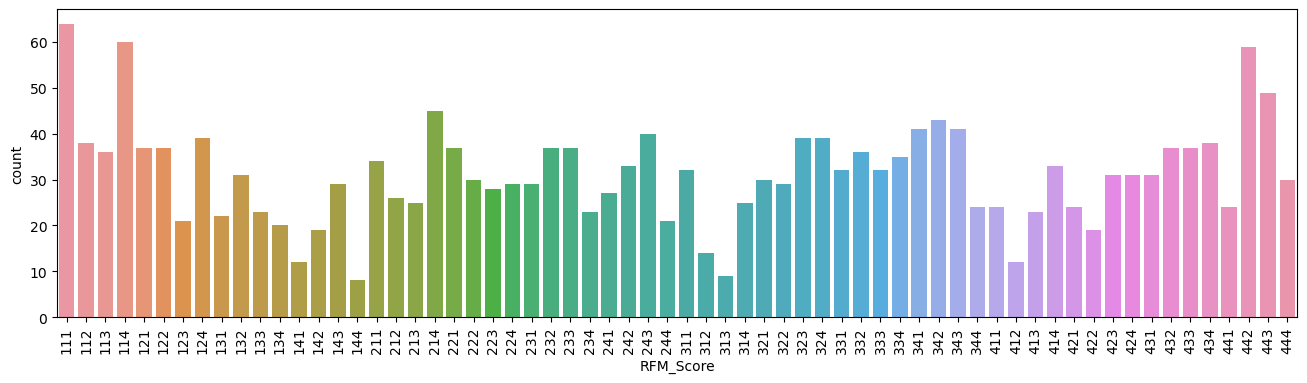

In [111]:
plt.figure(figsize=(16,4))
sns.countplot(df_churn.RFM_Score)
plt.xticks(rotation = 90)
plt.show()

## RFM calculation
- Recency: date of observation - LastPurchaseDate
- Frequency: TotalPurchases / TimeSinceFirstPurchase
- Monetary value: TotalAmount / TotalQuantity

### Feature Engineering

In [112]:
df_churn['UPT'] = df_churn.TotalQuantity/df_churn.TotalPurchases
df_churn['AOV'] = df_churn.TotalAmount/df_churn.TotalPurchases
df_churn['CLV'] = df_churn.MonetaryValue*df_churn.TotalPurchases
df_churn['Engagement_Ratio'] = df_churn.TimeSinceFirstPurchase/df_churn.Recency
df_churn['RFM_Segment'] = pd.qcut(df_churn['RFM_Score'], q=4, labels=['Level1', 'Level2', 'Level3','Level4'])

# df_churn['RFM_Segment'] = df_churn['RFM_Segment'].astype(object)

### unified dataset

In [113]:
# merging orders and products dataset 
df_merged = pd.merge(df_orders, df_products.drop(columns=['Discount']), on=['ProductID', 'Brand','Category'], how='left')

# merging promotion dataset
df_merged = pd.merge(df_merged,df_promotions.drop(columns=['DiscountPercentage']), on=['PromotionID', 'Brand','Category'], how='left')

#merging churn dataset
df_merged = pd.merge(df_churn, df_merged,on=['CustomerID'], how='left')

df_merged.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Profession',
       'Work Experience', 'Family Size', 'City', 'LastPurchaseDate',
       'FirstPurchaseDate', 'TotalPurchases', 'TotalAmount', 'TotalQuantity',
       'Recency', 'TimeSinceFirstPurchase', 'Frequency', 'MonetaryValue',
       'LongTermCustomer', 'R', 'F', 'M', 'RFM_Score', 'Churn', 'UPT', 'AOV',
       'CLV', 'Engagement_Ratio', 'RFM_Segment', 'OrderID', 'ProductID',
       'Purchase_Date', 'Quantity', 'Original_Price', 'Discount',
       'Discounted_Price', 'PromotionID', 'Brand', 'Category', 'Total_Amount',
       'Product_Name', 'Price', 'Release_Date', 'StartDate', 'EndDate'],
      dtype='object')

In [114]:
# aggregating orders data at customer level
agg_order_features = df_orders.groupby('CustomerID').agg({
    'Brand': ['nunique', lambda x: x.value_counts().idxmax()],
    'PromotionID': 'nunique',
    'Total_Amount': lambda x: (df_orders['Quantity'] * df_orders['Original_Price']-x).sum(),
})
agg_order_features.columns = ['Unique_Brands', 'Most_Frequent_Brand', 'Promotion_Usage_Count','Total_Discount_Availed']
agg_order_features.reset_index(inplace=True)
agg_order_features

,CustomerID,Unique_Brands,Most_Frequent_Brand,Promotion_Usage_Count,Total_Discount_Availed
0,1,14,H&M,3,1607.5
1,2,14,Tommy Hilfiger,4,2077.0
2,3,11,Louis Vuitton,5,3346.0
3,4,12,Ralph Lauren,5,1455.0
4,5,10,Under Armour,4,931.0
...,...,...,...,...,...
1995,1996,8,Tommy Hilfiger,1,698.5
1996,1997,12,Ralph Lauren,9,2514.5
1997,1998,14,Ralph Lauren,3,1136.5
1998,1999,10,Nike,4,1307.0


In [115]:
# df_churn = pd.merge(df_churn, agg_order_features, on='CustomerID', how='left')

In [116]:
df_merged = df_churn # for testing purpose

<AxesSubplot:>

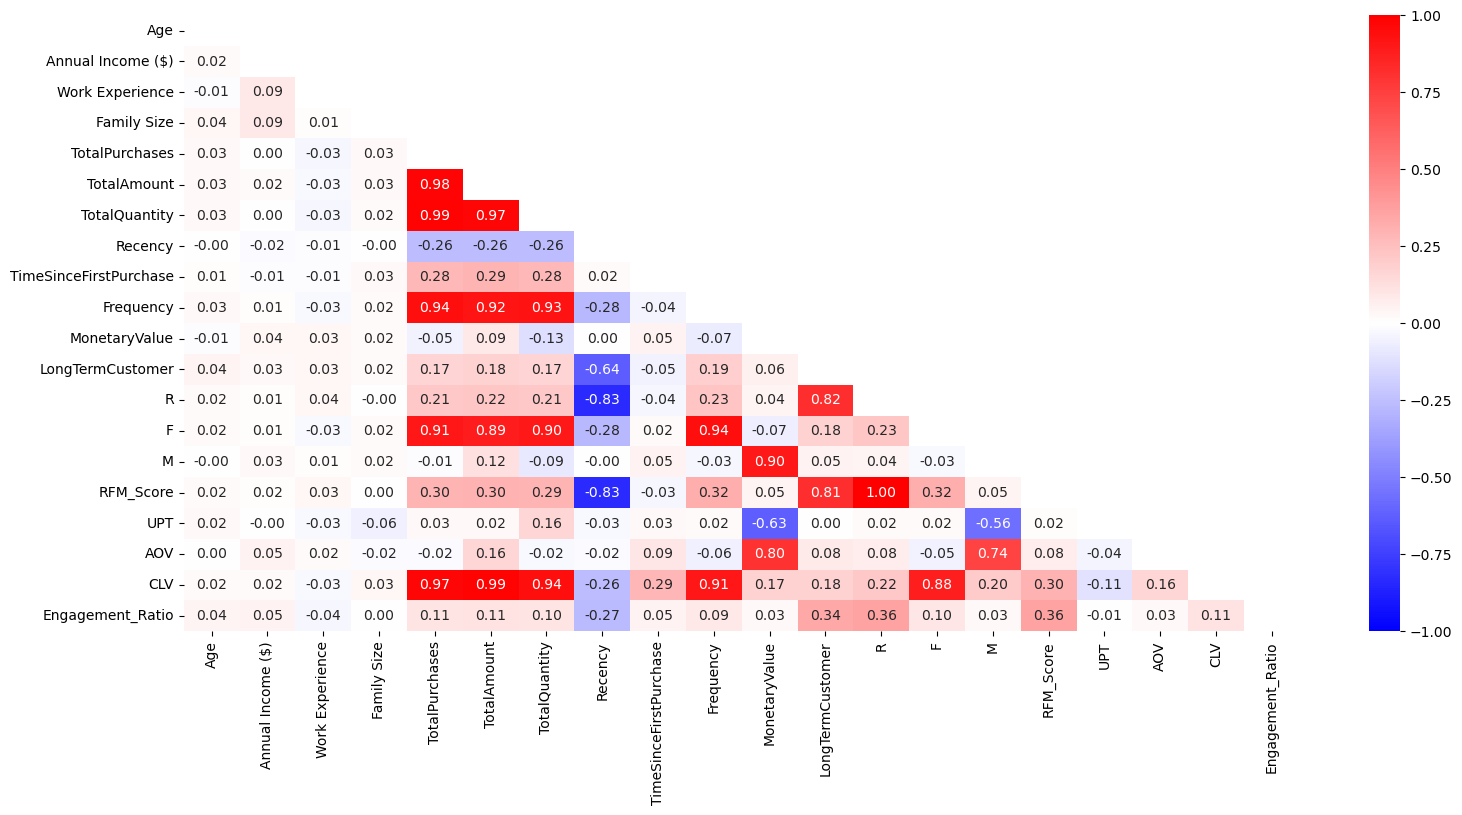

In [117]:
plt.figure(figsize=((18,8)))
plt.tight_layout()
correlation_matrix = df_merged.drop(['CustomerID','Churn'], axis = 1).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,mask=mask, annot=True,  cmap='bwr', fmt=".2f", vmin=-1, vmax=1)

<AxesSubplot:xlabel='RFM_Score', ylabel='Density'>

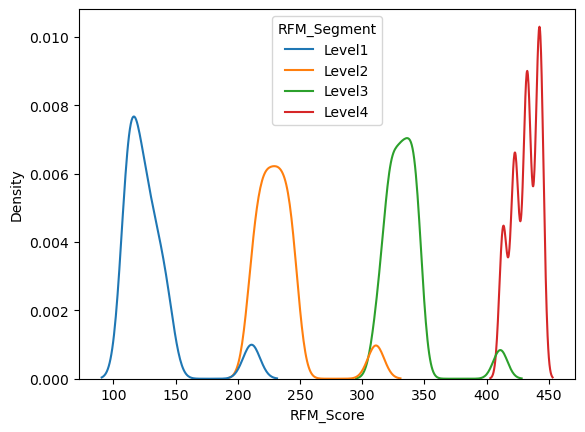

In [118]:
sns.kdeplot(df_merged.RFM_Score, hue=df_merged.RFM_Segment)

In [119]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              2000 non-null   int64         
 1   Gender                  2000 non-null   object        
 2   Age                     2000 non-null   int64         
 3   Annual Income ($)       2000 non-null   int64         
 4   Profession              1965 non-null   object        
 5   Work Experience         2000 non-null   int64         
 6   Family Size             2000 non-null   int64         
 7   City                    2000 non-null   object        
 8   LastPurchaseDate        2000 non-null   datetime64[ns]
 9   FirstPurchaseDate       2000 non-null   datetime64[ns]
 10  TotalPurchases          2000 non-null   int64         
 11  TotalAmount             2000 non-null   float64       
 12  TotalQuantity           2000 non-null   int64   

In [181]:
#columns to be removed - 0,4,8,9,10,11,12,14,15,18,19,20,21,24,28
# columns_to_remove = df_merged.columns[[0,8,9,21,27,28,11,13,15,16,25,15,12,30]]
# columns_to_remove = df_merged.columns[[0,28,29,35, 8,9,30,41,42,43, 39]]
columns_to_remove = df_merged.columns[[0,8,9,11,12,15,21]]
columns_to_remove

Index(['CustomerID', 'LastPurchaseDate', 'FirstPurchaseDate', 'TotalAmount',
       'TotalQuantity', 'Frequency', 'RFM_Score'],
      dtype='object')

In [182]:
temp = df_merged.drop(columns=columns_to_remove,axis=1)
temp

,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,City,TotalPurchases,Recency,TimeSinceFirstPurchase,...,LongTermCustomer,R,F,M,Churn,UPT,AOV,CLV,Engagement_Ratio,RFM_Segment
0,Male,19,15000,Healthcare,1,4,Raleigh,83,4,1725,...,1,4,3,4,0,2.963855,84.698193,2371.893699,431.250000,Level4
1,Male,21,35000,Engineer,3,3,Detroit,142,56,1692,...,1,3,4,3,1,2.957746,76.609085,3677.965667,30.214286,Level3
2,Female,20,86000,Engineer,1,1,San Antonio,78,82,1366,...,1,3,3,4,0,2.897436,83.846410,2257.175044,16.658537,Level3
3,Female,23,59000,Lawyer,0,2,Detroit,71,112,1798,...,0,3,2,2,0,3.126761,78.252958,1776.906126,16.053571,Level3
4,Female,31,38000,Entertainment,2,6,Tulsa,73,298,1489,...,0,1,3,1,0,3.095890,65.606438,1546.976593,4.996644,Level1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,71,184387,Artist,8,7,Atlanta,48,185,1734,...,0,2,1,4,0,3.083333,86.138333,1340.964324,9.372973,Level2
1996,Female,91,73158,Doctor,7,7,Albuquerque,40,120,1725,...,0,3,1,1,1,3.075000,71.715000,932.878049,14.375000,Level2
1997,Male,87,90961,Healthcare,9,2,Memphis,79,51,1778,...,1,3,2,1,0,3.367089,75.859873,1779.855150,34.862745,Level3
1998,Male,77,182109,Executive,7,2,Houston,80,2,1446,...,1,4,3,4,0,2.875000,82.019500,2282.281739,723.000000,Level4


In [183]:
temp.iloc[0,:]

Gender                           Male
Age                                19
Annual Income ($)               15000
Profession                 Healthcare
Work Experience                     1
Family Size                         4
City                          Raleigh
TotalPurchases                     83
Recency                             4
TimeSinceFirstPurchase           1725
MonetaryValue               28.577033
LongTermCustomer                    1
R                                   4
F                                   3
M                                   4
Churn                               0
UPT                          2.963855
AOV                         84.698193
CLV                       2371.893699
Engagement_Ratio               431.25
RFM_Segment                    Level4
Name: 0, dtype: object

<AxesSubplot:>

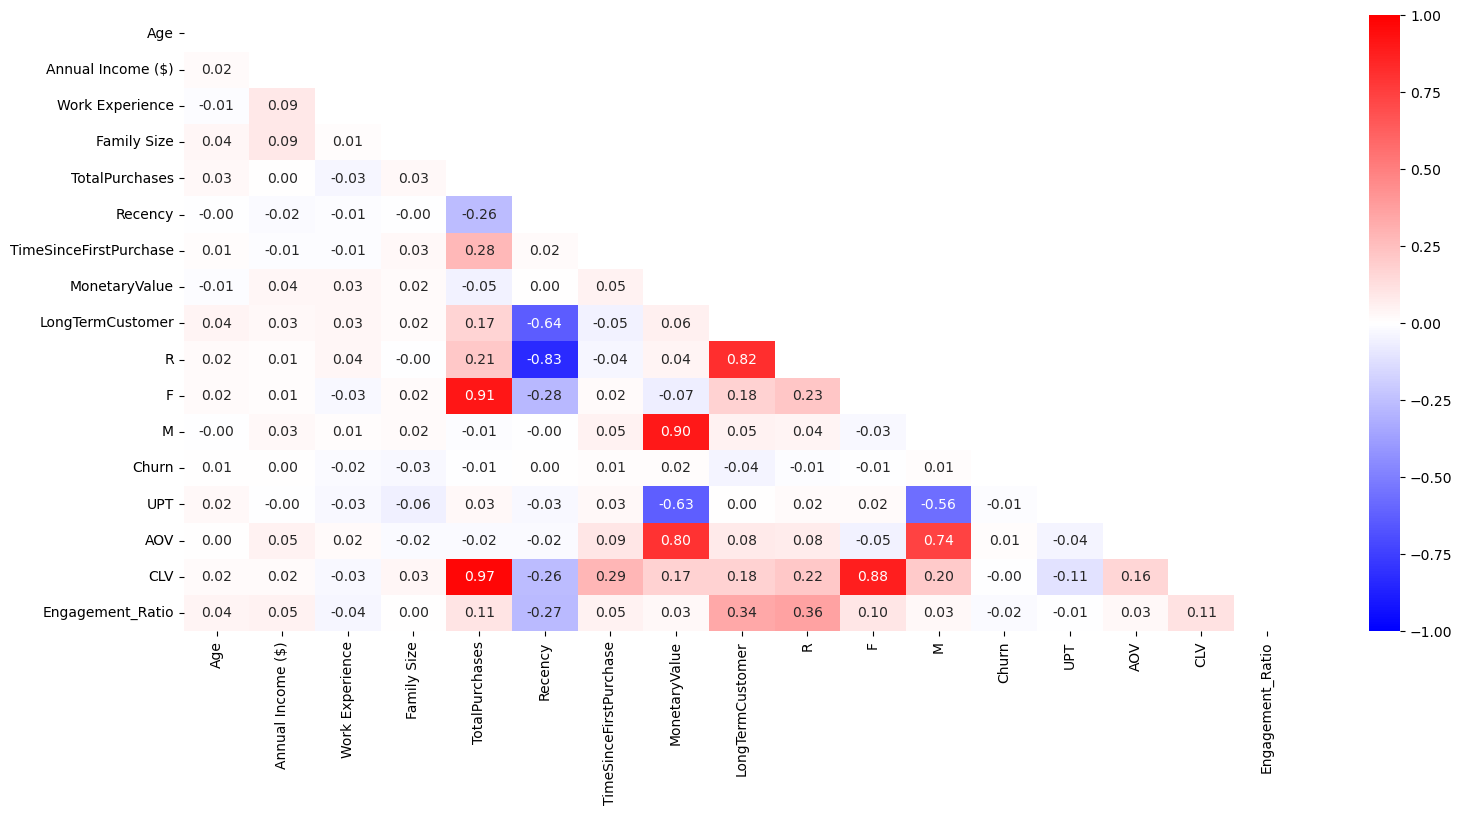

In [184]:
# correlation after feature selection
plt.figure(figsize=((18,8)))
plt.tight_layout()
mask = np.triu(np.ones_like(temp.corr(), dtype=bool))
sns.heatmap(temp.corr(),mask = mask ,annot=True,  cmap='bwr', fmt=".2f", vmin=-1, vmax=1)


In [185]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  2000 non-null   object  
 1   Age                     2000 non-null   int64   
 2   Annual Income ($)       2000 non-null   int64   
 3   Profession              1965 non-null   object  
 4   Work Experience         2000 non-null   int64   
 5   Family Size             2000 non-null   int64   
 6   City                    2000 non-null   object  
 7   TotalPurchases          2000 non-null   int64   
 8   Recency                 2000 non-null   int64   
 9   TimeSinceFirstPurchase  2000 non-null   int64   
 10  MonetaryValue           2000 non-null   float64 
 11  LongTermCustomer        2000 non-null   int32   
 12  R                       2000 non-null   int64   
 13  F                       2000 non-null   int64   
 14  M                       

In [186]:

# plt.figure(figsize=(15,6))
# plt.subplot(221)
# sns.boxplot(x=df_churn.Recency)
# plt.subplot(222)
# sns.kdeplot(x=df_churn.Recency)
# plt.subplot(223)
# sns.boxplot(x=np.log(df_churn.Recency))
# plt.subplot(224)
# sns.kdeplot(x=np.log(df_churn.Recency))

# plt.show()


In [187]:
# #log transformation
# plt.figure(figsize=(15,6))
# plt.subplot(221)
# sns.boxplot(x=df_churn.TimeSinceFirstPurchase)
# plt.subplot(222)
# sns.kdeplot(x=df_churn.TimeSinceFirstPurchase)
# plt.subplot(223)
# sns.boxplot(x=np.log(df_churn.TimeSinceFirstPurchase))
# plt.subplot(224)
# sns.kdeplot(x=np.log(df_churn.TimeSinceFirstPurchase))
# plt.show()

In [188]:
# q1 = np.percentile(df_churn.Recency,25)
# q3 = np.percentile(df_churn.Recency,75)
# IQR = q3-q1

In [189]:
# df_churn.where(df_churn.Recency>q3+1.5*IQR)

In [190]:
# df_churn[df_churn.Recency<q3+1.5*IQR]

In [191]:
# 82/2000*100

In [192]:
temp

,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,City,TotalPurchases,Recency,TimeSinceFirstPurchase,...,LongTermCustomer,R,F,M,Churn,UPT,AOV,CLV,Engagement_Ratio,RFM_Segment
0,Male,19,15000,Healthcare,1,4,Raleigh,83,4,1725,...,1,4,3,4,0,2.963855,84.698193,2371.893699,431.250000,Level4
1,Male,21,35000,Engineer,3,3,Detroit,142,56,1692,...,1,3,4,3,1,2.957746,76.609085,3677.965667,30.214286,Level3
2,Female,20,86000,Engineer,1,1,San Antonio,78,82,1366,...,1,3,3,4,0,2.897436,83.846410,2257.175044,16.658537,Level3
3,Female,23,59000,Lawyer,0,2,Detroit,71,112,1798,...,0,3,2,2,0,3.126761,78.252958,1776.906126,16.053571,Level3
4,Female,31,38000,Entertainment,2,6,Tulsa,73,298,1489,...,0,1,3,1,0,3.095890,65.606438,1546.976593,4.996644,Level1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,71,184387,Artist,8,7,Atlanta,48,185,1734,...,0,2,1,4,0,3.083333,86.138333,1340.964324,9.372973,Level2
1996,Female,91,73158,Doctor,7,7,Albuquerque,40,120,1725,...,0,3,1,1,1,3.075000,71.715000,932.878049,14.375000,Level2
1997,Male,87,90961,Healthcare,9,2,Memphis,79,51,1778,...,1,3,2,1,0,3.367089,75.859873,1779.855150,34.862745,Level3
1998,Male,77,182109,Executive,7,2,Houston,80,2,1446,...,1,4,3,4,0,2.875000,82.019500,2282.281739,723.000000,Level4


### -------------------------------------------------------------------------------------------------------------------------

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report, f1_score
from sklearn.feature_selection import SelectKBest,chi2

In [194]:
from sklearn import set_config
set_config(display='diagram')

In [195]:
temp.columns

Index(['Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience',
       'Family Size', 'City', 'TotalPurchases', 'Recency',
       'TimeSinceFirstPurchase', 'MonetaryValue', 'LongTermCustomer', 'R', 'F',
       'M', 'Churn', 'UPT', 'AOV', 'CLV', 'Engagement_Ratio', 'RFM_Segment'],
      dtype='object')

In [196]:
x = temp.drop(['Churn'], axis=1)
y = temp['Churn']

In [197]:
# temp[['Brand','Category','Product_Name']].nunique()

In [198]:
# x=temp[['Recency','Frequency','MonetaryValue']]
# y = temp['Churn']

In [199]:
categorical_column_names= x.select_dtypes(include=['object','category']).columns
numerical_column_names= x.select_dtypes(include='number').columns

exclude_columns = ['LongTermCustomer','R', 'F', 'M']
numerical_column_names = [col for col in numerical_column_names if col not in exclude_columns]

print('categorical: ',categorical_column_names)
print('numerical: ',numerical_column_names)


categorical:  Index(['Gender', 'Profession', 'City', 'RFM_Segment'], dtype='object')
numerical:  ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'TotalPurchases', 'Recency', 'TimeSinceFirstPurchase', 'MonetaryValue', 'UPT', 'AOV', 'CLV', 'Engagement_Ratio']


In [200]:
categorical_col_index = [x.columns.get_loc(i) for i in categorical_column_names]
print('categorical: ',categorical_col_index)
numerical_col_index = [x.columns.get_loc(i) for i in numerical_column_names]
print('numerical: ',numerical_col_index)

categorical:  [0, 3, 6, 19]
numerical:  [1, 2, 4, 5, 7, 8, 9, 10, 15, 16, 17, 18]


In [201]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [202]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1059 to 433
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  1600 non-null   object  
 1   Age                     1600 non-null   int64   
 2   Annual Income ($)       1600 non-null   int64   
 3   Profession              1574 non-null   object  
 4   Work Experience         1600 non-null   int64   
 5   Family Size             1600 non-null   int64   
 6   City                    1600 non-null   object  
 7   TotalPurchases          1600 non-null   int64   
 8   Recency                 1600 non-null   int64   
 9   TimeSinceFirstPurchase  1600 non-null   int64   
 10  MonetaryValue           1600 non-null   float64 
 11  LongTermCustomer        1600 non-null   int32   
 12  R                       1600 non-null   int64   
 13  F                       1600 non-null   int64   
 14  M                     

In [203]:
imputer = SimpleImputer(strategy='most_frequent')
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

In [204]:
categorical_pipeline = Pipeline([
    ('imputer', imputer),
    ('onehot', onehot)
])
numerical_pipeline = Pipeline([
    ('Scaling', RobustScaler())
])

In [205]:
# column_transformer = ColumnTransformer(transformers=[
#     ('numerical',numerical_pipeline,[0]),
#     ('scaling',MinMaxScaler(),[1,2]),
#     ('categorical', categorical_pipeline, categorical_col_index)
# ], remainder='passthrough')

In [206]:
column_transform = ColumnTransformer(transformers=[
    ('numerical',numerical_pipeline,numerical_column_names),
    ('categorical',categorical_pipeline, categorical_column_names)
], remainder='passthrough')

In [207]:
x_train_transformed = column_transform.fit_transform(x_train)
x_test_transformed = column_transform.fit_transform(x_test)
x_train_transformed.shape

(1600, 77)

In [208]:
x_train.iloc[0,:]

Gender                         Female
Age                                34
Annual Income ($)              139009
Profession                     Artist
Work Experience                     0
Family Size                         4
City                             Mesa
TotalPurchases                     62
Recency                            37
TimeSinceFirstPurchase           1653
MonetaryValue               25.831383
LongTermCustomer                    1
R                                   4
F                                   2
M                                   3
UPT                          3.032258
AOV                         78.327419
CLV                       1601.545745
Engagement_Ratio            44.675676
RFM_Segment                    Level4
Name: 1059, dtype: object

In [209]:
cat_feature_names = column_transform.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_column_names)
transformed_feature_name = list(numerical_column_names)+ list(cat_feature_names) + list(exclude_columns)
transformed_feature_name

['Age',
 'Annual Income ($)',
 'Work Experience',
 'Family Size',
 'TotalPurchases',
 'Recency',
 'TimeSinceFirstPurchase',
 'MonetaryValue',
 'UPT',
 'AOV',
 'CLV',
 'Engagement_Ratio',
 'Gender_Male',
 'Profession_Doctor',
 'Profession_Engineer',
 'Profession_Entertainment',
 'Profession_Executive',
 'Profession_Healthcare',
 'Profession_Homemaker',
 'Profession_Lawyer',
 'Profession_Marketing',
 'City_Arlington',
 'City_Atlanta',
 'City_Austin',
 'City_Baltimore',
 'City_Boston',
 'City_Charlotte',
 'City_Chicago',
 'City_Colorado Springs',
 'City_Columbus',
 'City_Dallas',
 'City_Denver',
 'City_Detroit',
 'City_El Paso',
 'City_Fort Worth',
 'City_Fresno',
 'City_Houston',
 'City_Indianapolis',
 'City_Jacksonville',
 'City_Kansas City',
 'City_Las Vegas',
 'City_Long Beach',
 'City_Los Angeles',
 'City_Louisville',
 'City_Memphis',
 'City_Mesa',
 'City_Miami',
 'City_Milwaukee',
 'City_Minneapolis',
 'City_Nashville',
 'City_New Orleans',
 'City_New York',
 'City_Oakland',
 'City_

In [210]:
pd.DataFrame(temp, columns=transformed_feature_name ).columns

Index(['Age', 'Annual Income ($)', 'Work Experience', 'Family Size',
       'TotalPurchases', 'Recency', 'TimeSinceFirstPurchase', 'MonetaryValue',
       'UPT', 'AOV', 'CLV', 'Engagement_Ratio', 'Gender_Male',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'City_Arlington',
       'City_Atlanta', 'City_Austin', 'City_Baltimore', 'City_Boston',
       'City_Charlotte', 'City_Chicago', 'City_Colorado Springs',
       'City_Columbus', 'City_Dallas', 'City_Denver', 'City_Detroit',
       'City_El Paso', 'City_Fort Worth', 'City_Fresno', 'City_Houston',
       'City_Indianapolis', 'City_Jacksonville', 'City_Kansas City',
       'City_Las Vegas', 'City_Long Beach', 'City_Los Angeles',
       'City_Louisville', 'City_Memphis', 'City_Mesa', 'City_Miami',
       'City_Milwaukee', 'City_Minneapolis', 'City_Nashville',
       'City_Ne

In [211]:
x_train_transformed[0,:]

array([-0.29787234,  0.39975155, -0.5       ,  0.        , -0.36363636,
       -0.40291262, -0.28005284,  0.08082262,  0.14285397,  0.23505308,
       -0.3332524 ,  1.18832029,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [212]:
# Normalizer().fit_transform(x_train_transformed)

In [213]:
# pd.DataFrame(x_train_transformed)

In [214]:
# pd.DataFrame(column_transformer.fit_transform(x_test))

In [215]:
k_best_feature = SelectKBest(score_func=chi2,k=15)

In [216]:
pipeline_lr = Pipeline([
    ('col_transform', column_transform),
#     ('Scaling', MinMaxScaler()),
#     ('best_feature', k_best_feature),
    ('model',LogisticRegression())
])

pipeline_rf = Pipeline([
    ('col_transform', column_transform),
#     ('Scaling', MinMaxScaler()),
#     ('best_feature', k_best_feature),
    ('model',RandomForestClassifier())
])

pipeline_gb = Pipeline([
    ('col_transform', column_transform),
#     ('Scaling', MinMaxScaler()),
#     ('best_feature', k_best_feature),
    ('model',GradientBoostingClassifier())
])

In [217]:
pipeline_lr.fit(x_train,y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler())]),
                                                  ['Age', 'Annual Income ($)',
                                                   'Work Experience',
                                                   'Family Size',
                                                   'TotalPurchases', 'Recency',
                                                   'TimeSinceFirstPurchase',
                                                   'MonetaryValue', 'UPT',
                                                   'AOV', 'CLV',
                                                   'Engagement_Ratio']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Profession', 'City', 'RFM_Segment'], dtype='object'))])),
                ('model', LogisticRegression())])

In [218]:
print('accuracy_socre_train: ',accuracy_score(y_train, pipeline_lr.predict(x_train)))
print('accuracy_socre_test: ',accuracy_score(y_test, pipeline_lr.predict(x_test)))
# print('f1-score:', f1_score(y_test,pipeline_lr.predict(x_test)))
print('calssification Report: \n', classification_report(y_test,pipeline_lr.predict(x_test)))

accuracy_socre_train:  0.585
accuracy_socre_test:  0.5
calssification Report: 
               precision    recall  f1-score   support

           0       0.52      0.54      0.53       208
           1       0.48      0.45      0.47       192

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



In [219]:
pipeline_rf.fit(x_train,y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler())]),
                                                  ['Age', 'Annual Income ($)',
                                                   'Work Experience',
                                                   'Family Size',
                                                   'TotalPurchases', 'Recency',
                                                   'TimeSinceFirstPurchase',
                                                   'MonetaryValue', 'UPT',
                                                   'AOV', 'CLV',
                                                   'Engagement_Ratio']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Profession', 'City', 'RFM_Segment'], dtype='object'))])),
                ('model', RandomForestClassifier())])

In [220]:
print('accuracy_socre_train: ',accuracy_score(y_train, pipeline_rf.predict(x_train)))
print('accuracy_socre_test: ',accuracy_score(y_test, pipeline_rf.predict(x_test)))
print('calssification Report: \n', classification_report(y_test,pipeline_rf.predict(x_test)))

accuracy_socre_train:  1.0
accuracy_socre_test:  0.5625
calssification Report: 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60       208
           1       0.55      0.49      0.52       192

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400



In [221]:
pipeline_gb.fit(x_train,y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler())]),
                                                  ['Age', 'Annual Income ($)',
                                                   'Work Experience',
                                                   'Family Size',
                                                   'TotalPurchases', 'Recency',
                                                   'TimeSinceFirstPurchase',
                                                   'MonetaryValue', 'UPT',
                                                   'AOV', 'CLV',
                                                   'Engagement_Ratio']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Profession', 'City', 'RFM_Segment'], dtype='object'))])),
                ('model', GradientBoostingClassifier())])

In [222]:
print('accuracy_socre_train: ',accuracy_score(y_train, pipeline_gb.predict(x_train)))
print('accuracy_socre_test: ',accuracy_score(y_test, pipeline_gb.predict(x_test)))
print('calssification Report: \n', classification_report(y_test,pipeline_gb.predict(x_test)))

accuracy_socre_train:  0.833125
accuracy_socre_test:  0.5075
calssification Report: 
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       208
           1       0.49      0.48      0.48       192

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400



### Hyper parameter tunning

In [243]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### Random Forest

In [244]:
%time
random_forest = RandomForestClassifier()
# Define hyperparameters grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform Grid Search for Random Forest model
rf_grid_search = GridSearchCV(random_forest, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(x_train_transformed, y_train)

Wall time: 0 ns


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [245]:
rf_grid_search.best_score_

1.0

In [246]:
rf_grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [247]:
print('random forest model with best estimator:')
print('train accuracy: ',accuracy_score(y_train, rf_grid_search.best_estimator_.predict(x_train_transformed)))
print('test accuracy: ',accuracy_score(y_test, rf_grid_search.best_estimator_.predict(x_test_transformed)))

random forest model with best estimator:
train accuracy:  1.0
test accuracy:  1.0


### Gradient Boosting

In [ ]:
%time
gradient_boosting = GradientBoostingClassifier()
# Define hyperparameters grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search for Gradient Boosting model
gb_random_search = RandomizedSearchCV(gradient_boosting, param_distributions=gb_param_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
gb_random_search.fit(x_train_transformed, y_train)

Wall time: 0 ns


In [ ]:
gb_random_search.best_estimator_

In [ ]:
gb_random_search.best_params_

In [ ]:
gb_random_search.best_score_

In [ ]:
#accuracy for loaded model
print('gradient boosting model with best estimator:')
print('train accuracy: ',accuracy_score(y_train, gb_random_search.best_estimator_.predict(x_train_transformed)))
print('test accuracy: ',accuracy_score(y_test, gb_random_search.best_estimator_.predict(x_test_transformed)))

### -------------------------------------------------------------------------------------------------------------------------

### Packaging the ML Model

In [ ]:
import pickle

In [ ]:
best_model = gb_random_search.best_estimator_

In [ ]:
model_pipeline = Pipeline([
    ('col_transform', column_transform),
    ('model',best_model)
])

In [ ]:
#Savig model to .pkl file

with open('model_gb.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

In [ ]:
#loading the saved model 
with open('model_gb.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
#accuracy for loaded model
print('gradient boosting model with best estimator:')
print('train accuracy: ',accuracy_score(y_train, loaded_model.predict(x_train)))
print('test accuracy: ',accuracy_score(y_test, loaded_model.predict(x_test)))

### ------------------------------------------------------------------------------------------------------------------------

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve

In [234]:
y_pred_prob = pipeline_rf.predict_proba(x_test)[:,1]
y_pred = pipeline_rf.predict(x_test)
# for i in range(len(y_pred)):
#     print(y_pred[i],':',y_pred_prob[i])

In [235]:
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(y_test,y_pred_prob)
ROC_AUC = roc_auc_score(y_test,y_pred_prob) 
print('Area under ROC curve: ',  ROC_AUC)

Area under ROC curve:  0.5429937900641025


In [236]:
lr_false_positive_rate

array([0.        , 0.        , 0.        , 0.00480769, 0.01442308,
       0.01923077, 0.02403846, 0.03846154, 0.04326923, 0.0625    ,
       0.07211538, 0.07692308, 0.08653846, 0.10096154, 0.11057692,
       0.13942308, 0.16346154, 0.18269231, 0.19230769, 0.22596154,
       0.24519231, 0.26442308, 0.29326923, 0.3125    , 0.37019231,
       0.41826923, 0.45673077, 0.51923077, 0.57211538, 0.59615385,
       0.65384615, 0.68269231, 0.75961538, 0.80288462, 0.84134615,
       0.88942308, 0.91826923, 0.94230769, 0.94711538, 0.95673077,
       0.95673077, 0.97115385, 0.97596154, 0.99519231, 1.        ,
       1.        , 1.        ])

Text(0, 0.5, 'true positive rate')

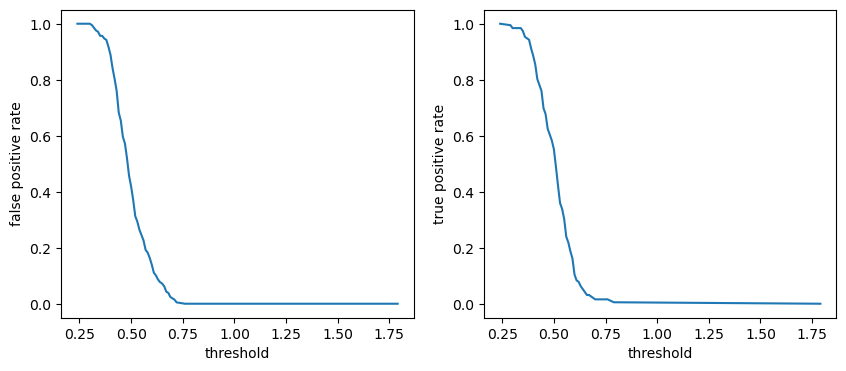

In [237]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(x=lr_threshold, y=lr_false_positive_rate)
plt.xlabel('threshold')
plt.ylabel('false positive rate')
plt.subplot(122)
sns.lineplot(x=lr_threshold, y=lr_true_positive_rate)
plt.xlabel('threshold')
plt.ylabel('true positive rate')


Text(0.5, 1.0, 'ROC-AUC Graph')

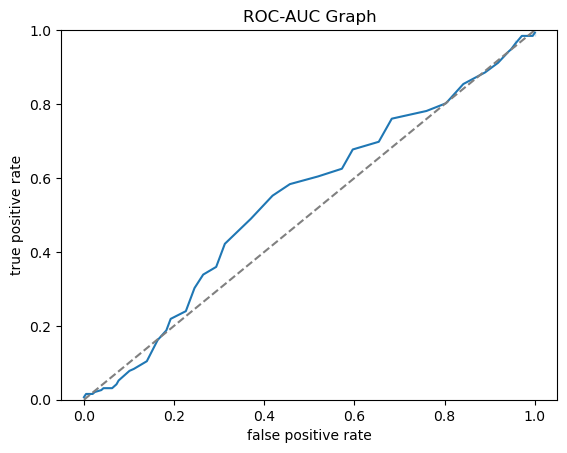

In [238]:
sns.lineplot(x=lr_false_positive_rate, y=lr_true_positive_rate)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.ylim([0, 1])
plt.title('ROC-AUC Graph')

In [239]:
optimal_index = np.argmax(lr_true_positive_rate-lr_false_positive_rate)
optimal_thresould = lr_threshold[optimal_index]
optimal_thresould

0.5

In [240]:
# prediction with default 0.5 thresould
pd.DataFrame(y_pred).value_counts()

0    229
1    171
dtype: int64

In [241]:
print('accuracy_socre_train: ',accuracy_score(y_train, pipeline_lr.predict(x_train)))
print('accuracy_socre_test: ',accuracy_score(y_test,y_pred))
# print('f1-score:', f1_score(y_test,pipeline_lr.predict(x_test)))
print('calssification Report: \n', classification_report(y_test,y_pred))

accuracy_socre_train:  0.585
accuracy_socre_test:  0.5625
calssification Report: 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60       208
           1       0.55      0.49      0.52       192

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400



In [242]:
y_pred = np.where(y_pred_prob>optimal_thresould,1,0)

In [232]:
# prediction with optimal throsould
pd.DataFrame(y_pred).value_counts()

1    343
0     57
dtype: int64

In [233]:
print('accuracy_socre_train: ',accuracy_score(y_train, pipeline_lr.predict(x_train)))
print('accuracy_socre_test: ',accuracy_score(y_test,y_pred))
# print('f1-score:', f1_score(y_test,pipeline_lr.predict(x_test)))
print('calssification Report: \n', classification_report(y_test,y_pred))

accuracy_socre_train:  0.585
accuracy_socre_test:  0.5075
calssification Report: 
               precision    recall  f1-score   support

           0       0.60      0.16      0.26       208
           1       0.49      0.88      0.63       192

    accuracy                           0.51       400
   macro avg       0.54      0.52      0.44       400
weighted avg       0.55      0.51      0.44       400



### ------------------------------------------------------------------------------------------------------------------------